In [1]:
import cv2
from matplotlib.pyplot import imshow
import numpy as np

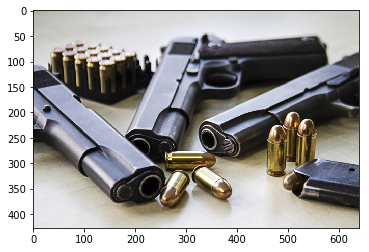

In [2]:
guns_image = cv2.imread("Data/Guns and Bullets.jpg", cv2.IMREAD_COLOR)
guns_gray_image = cv2.cvtColor(guns_image, cv2.COLOR_BGR2GRAY) 
imshow(cv2.cvtColor(guns_image, cv2.COLOR_BGR2RGB) )

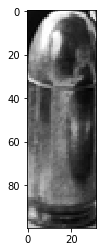

In [3]:
image_size_y = guns_image.shape[0]
image_size_x = guns_image.shape[1]
bullet_y_beg = int(image_size_y/2) + 13
bullet_image_width = 100
bullet_y_end = bullet_y_beg + bullet_image_width
bullet_x_beg = int(image_size_x/2) + 142
bullet__image_height = 32
bullet_x_end = bullet_x_beg + bullet__image_height
bullet_image = guns_gray_image[bullet_y_beg: bullet_y_end, 
                               bullet_x_beg: bullet_x_end]
imshow(bullet_image, cmap='gray' )

- First The Image is loaded and converted to Gray Scale Image as the Template Matching function is designed to work with Gray Scale Images. After this the object image is cut-off from the main Image.
- Then a sliding window of same dimensions as the object image is taken on the top left side of the gray scaled image. The sliding window takes the part of the image inside it and compares it with the object image.
- It provides a numerical outcome or result which indicates the how well the image cutout fits with object image . It computes the result using the method chosen. The method that is chosen here takes the dot product of the cutout of the image and the object image and normalizes it.
- Then sliding window in the main images moves right by few pixels and again performs the same processes as used before.
- The Template Matching function returns a matrix such that the result of a image maching between the image inside the window and the object has the same indices as the indices of the left top most pixel of the sliding window in the original image.
- The parts of the results with value more than 0.49 are chosen. The matix recieved after threshold comparision contains the the indices of the results that satisfies the condition. The the 1st row and nth coloum, and 2nd row and nth coloum determines the row and coloum indices of the nth result that satisfies the given conditions.

In [4]:
threshold = 0.49
probable_matches = cv2.matchTemplate(guns_gray_image, bullet_image,
                                     cv2.TM_CCOEFF_NORMED)
matches_location = np.where(probable_matches >= threshold)

- The zip combines row and coloum indices of each sucessful match into one Tuples and generates a list of all the tuples.
- Rectangles of the size of the object images are drawn in the area that are sucessfully detected.
- The biggest problem with Template Matching is that it fails to detect rotated features and smaller features than the object in the image.

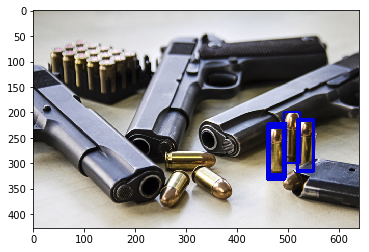

In [5]:
for point in zip(*matches_location[::-1]):
    point_end = (point[0] + bullet__image_height , 
                 point[1] + bullet_image_width)
    thickness = 2 
    colour    = (0, 0, 255)
    cv2.rectangle(guns_image, point, point_end, colour, thickness)
imshow(cv2.cvtColor(guns_image, cv2.COLOR_BGR2RGB) )